# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

2022-12-25 13:48:56.507065: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-25 13:48:56.507155: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-25 13:49:16.175270: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-25 13:49:16.175867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-25 13:49:16.175921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
tf.config.list_physical_devices('CPU')

2022-12-25 13:49:27.787739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-25 13:49:27.787823: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-25 13:49:27.787903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-HP-Pavilion-dv7-Notebook-PC): /proc/driver/nvidia/version does not exist


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Cleanup the images

In [4]:
import cv2, imghdr
from matplotlib import pyplot as plt

In [5]:
data_path = 'data'

In [6]:
image_extensions = ['jpeg', 'jpg', 'png', 'bmp']

In [7]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print(f"Image {image_path} not valid")
                os.remove(image_path)
        except Exceptions as e:
            print(f"Unable to read image {image_path}")
            continue

In [10]:
img = cv2.imread(os.path.join('data','puppy','Golde33443.jpg'))

In [11]:
img.shape

(965, 800, 3)

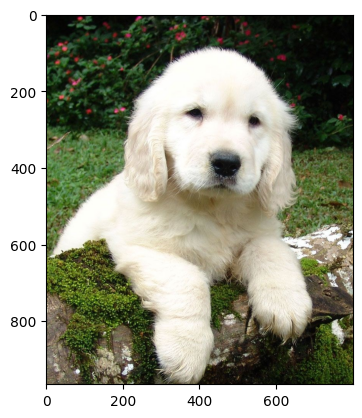

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Load Data

In [13]:
import numpy as np

In [14]:
# Create a data load pipeline with lazy execution
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [15]:
# Create an iterator from the Generator object above
# that can iterate through batches
data_iterator = data.as_numpy_iterator()

In [16]:
# Get the next batch of data
batch = data_iterator.next()

In [17]:
# batch has two parts - images and labels
batch[1] # labels
# Class 1 - Puppy
# Class 0 - Kitten

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

In [18]:
batch[0].shape # batch of 32 images with size

(32, 256, 256, 3)

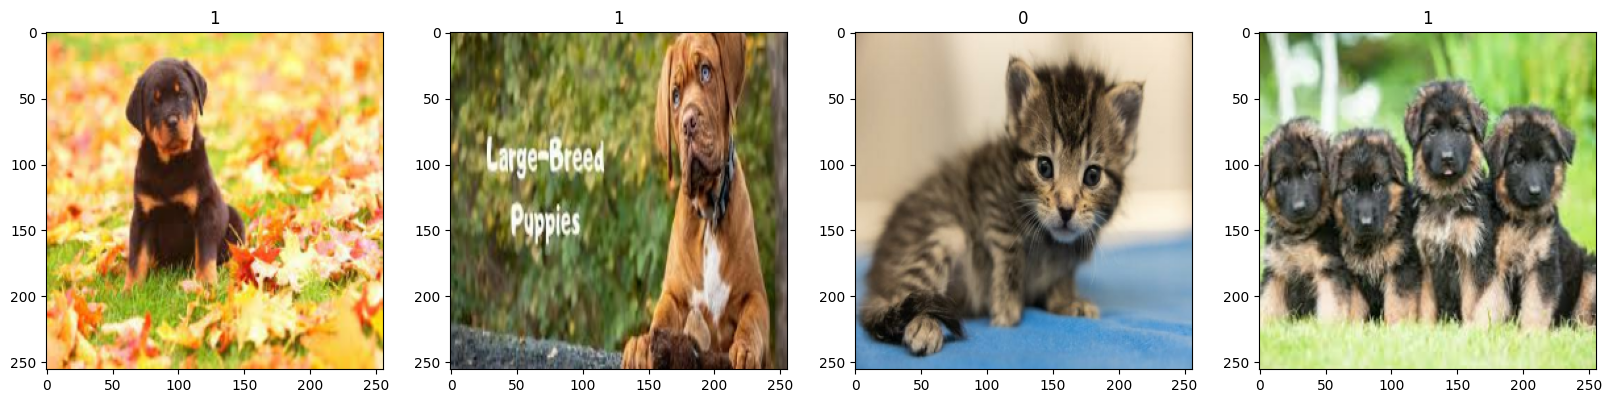

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Pre-process data

In [20]:
# a. Scale data
data = data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


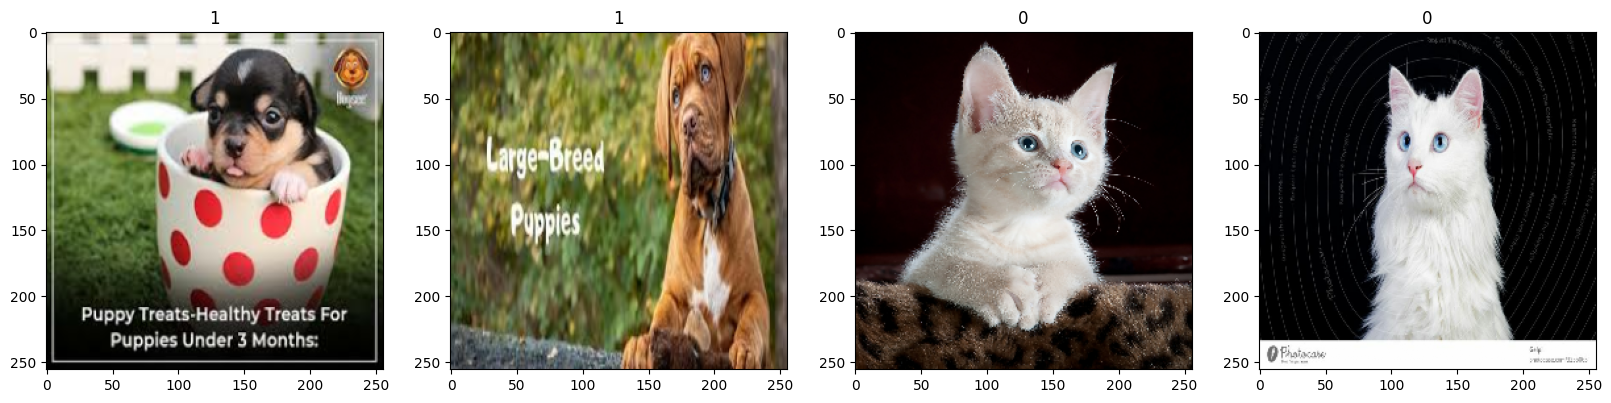

In [21]:
batch = data.as_numpy_iterator().next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [46]:
# b. Split data
train_size = int(len(data)* .7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [47]:
print(train_size, val_size, test_size, len(data))

7 2 1 10


In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Model

## a. Build DL Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## b. Train

In [53]:
logdir = 'logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
7/7 [==============================] - 19s 2s/step - loss: 1.3112 - accuracy: 0.5045 - val_loss: 0.6889 - val_accuracy: 0.5312
Epoch 2/25
7/7 [==============================] - 18s 2s/step - loss: 0.6812 - accuracy: 0.5446 - val_loss: 0.6654 - val_accuracy: 0.5781
Epoch 3/25
7/7 [==============================] - 21s 3s/step - loss: 0.6379 - accuracy: 0.6429 - val_loss: 0.5795 - val_accuracy: 0.7812
Epoch 4/25
7/7 [==============================] - 18s 2s/step - loss: 0.5640 - accuracy: 0.7321 - val_loss: 0.5126 - val_accuracy: 0.7656
Epoch 5/25
7/7 [==============================] - 17s 2s/step - loss: 0.5219 - accuracy: 0.7455 - val_loss: 0.4898 - val_accuracy: 0.7344
Epoch 6/25
7/7 [==============================] - 19s 2s/step - loss: 0.5218 - accuracy: 0.7455 - val_loss: 0.4349 - val_accuracy: 0.7812
Epoch 7/25
7/7 [==============================] - 18s 2s/step - loss: 0.4915 - accuracy: 0.7634 - val_loss: 0.4600 - val_accuracy: 0.8281
Epoch 8/25
7/7 [==================

In [33]:
# hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## c. Plot performance

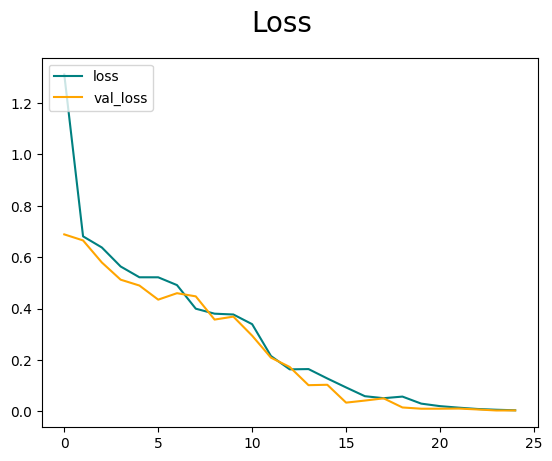

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

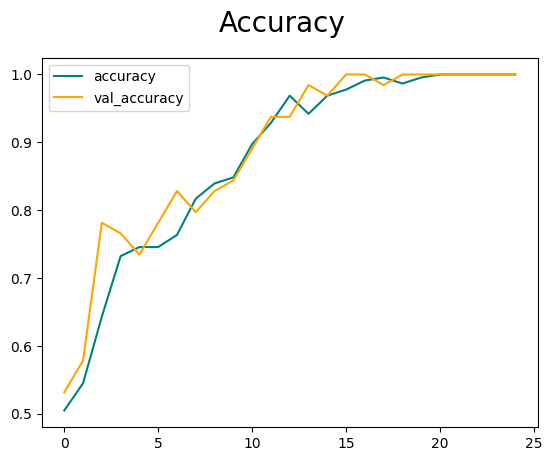

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 6. Evaluate Performance on Test data

## a. Evaluate

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
prec = Precision()
rec = Recall()
binacc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    binacc.update_state(y, yhat)

1/1 [==============================] - 0s 299ms/step


In [61]:
print(f"Precision: {prec.result()}, Recall: {rec.result()}, Binary Accuracy: {binacc.result()}")

Precision: 1.0, Recall: 1.0, Binary Accuracy: 1.0


## b. Test

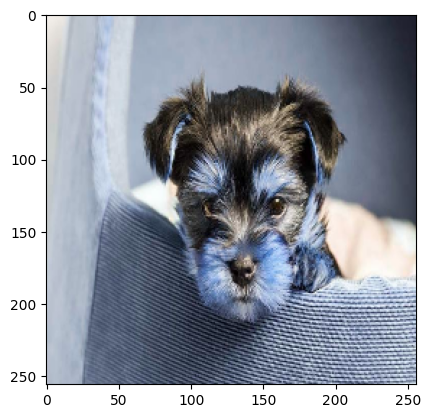

In [62]:
img = cv2.imread('test1.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat[0][0]

1/1 [==============================] - 0s 39ms/step


0.941066

In [64]:
if yhat[0][0] > 0.5:
    print("It's a Puppy!")
else:
    print("It's a Kitten!!")

It's a Puppy!


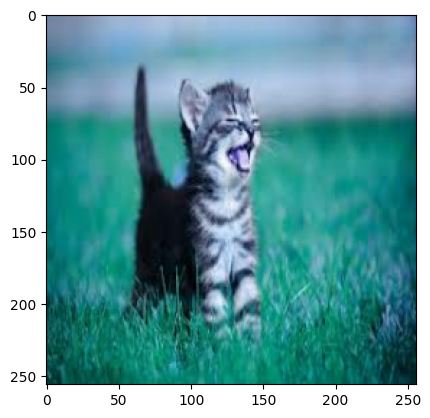

In [65]:
img = cv2.imread('kitten_test.jpeg')
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat[0][0]

1/1 [==============================] - 0s 39ms/step


0.08607273

In [67]:
if yhat[0][0] > 0.5:
    print("It's a Puppy!")
else:
    print("It's a Kitten!!")

It's a Kitten!!
